In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

In [11]:
pip install numpy

In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df=pd.read_csv("https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/refs/heads/main/New%20Netflix%20Data%20Analysis%20Project%202025/mymoviedb.csv", lineterminator='\n')

In [81]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [82]:
# check data typeof all data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [83]:
#  to check first 5 zoner
df['Genre'].head(10)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
5               Action, Crime, Thriller
6             Horror, Mystery, Thriller
7                              Thriller
8                Action, Crime, Fantasy
9                       Science Fiction
Name: Genre, dtype: object

In [27]:
# now check if any duplicate values exist in the data or not
df.duplicated().sum()

np.int64(0)

In [28]:
# now for basic statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
# Exploration summary
# data frame of 9827 rawa and 9 column
# Release_Date column need to be casted into date tome and extract only year value
# No duplicate and NaN'value in data
# Overview ,Original_Language and Poster_Url would not be useful during analysis so we will droup these column
# need to remove white space id necesary from the column genre

In [84]:
# change the dtype of release date column
df['Release_Date']=pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtype)

datetime64[ns]


In [85]:
# keep only year in the column release date because we need only year 
df['Release_Date']=df['Release_Date'].dt.year
print(df['Release_Date'].dtype)

int32


In [86]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [87]:
# now drouping the column that would not recquired
cols=['Overview','Original_Language','Poster_Url']


In [88]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [89]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# categorize the column 	"Vote_Average"
# we will make 4 category in column Vote_Average :1-popular .2-average.3-below average. 4-not popular by using categorize_col() function(which is useer defined function)

In [90]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,2006.203623,40.326088,1392.805536,6.439534
std,15.685554,108.873998,2611.206907,1.129759
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128500,146.000000,5.900000
50%,2011.000000,21.199000,444.000000,6.500000
75%,2017.000000,35.191500,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


In [113]:
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ] 
    # Ensure proper indentation and correct variable name

    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df

In [114]:
llabels = ['Not Popular', 'Below Average', 'Average', 'Popular']

# Check DataFrame before applying function
df.info()  # Verify column names & types
df.head()  # Check sample data

df = categorize_col(df, 'Vote_Average', labels)

# Verify the result
print(df['Vote_Average_Category'].unique())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
dtypes: category(1), float64(2), int32(1), int64(1), object(1)
memory usage: 932.8+ KB


KeyError: 'Vote_Average_Category'

In [115]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [116]:
df['Vote_Average'].value_counts()

Vote_Average
Not Popular      6999
Below Average    6581
Average          6432
Popular          5540
Name: count, dtype: int64

In [117]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# we will split genre into list

In [118]:
print(type(df)) 

<class 'pandas.core.frame.DataFrame'>


In [119]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [120]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [123]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [ ]:
sns.set_style('whitegrid')

In [ ]:
# Q1.What is most frequent genre of movie released on netflix

In [124]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

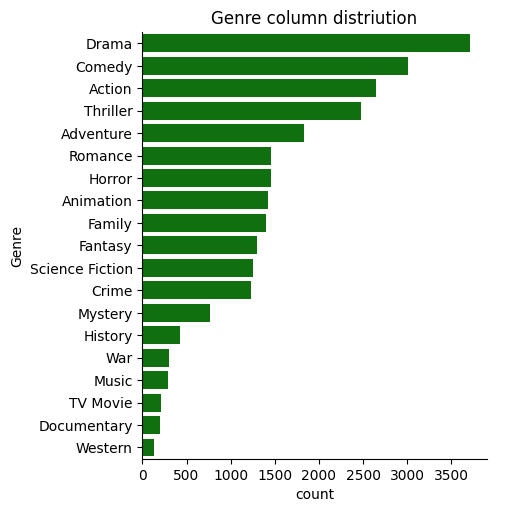

In [125]:
 sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='green')
plt.title('Genre column distriution')
plt.show()

# Q2.What Genre has highest votes?

In [126]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


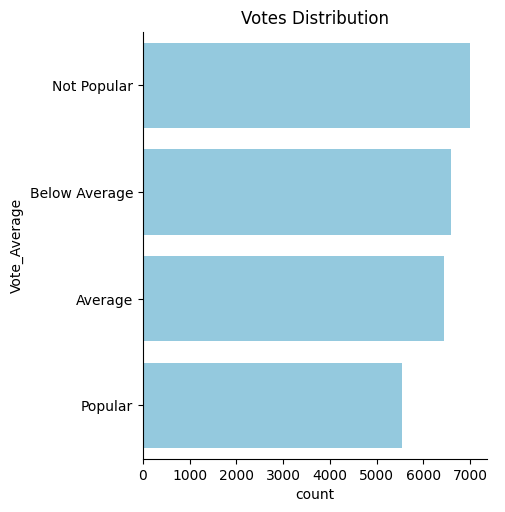

In [131]:
 sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='Skyblue')
plt.title('Votes Distribution')
plt.show()

# Q3. What movie got the highest popularity? And what its genre?

In [132]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# Q4.What movie got the lowest popularity ? whats its genre?

In [133]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


# Q5. Which year has the most filmed movies?

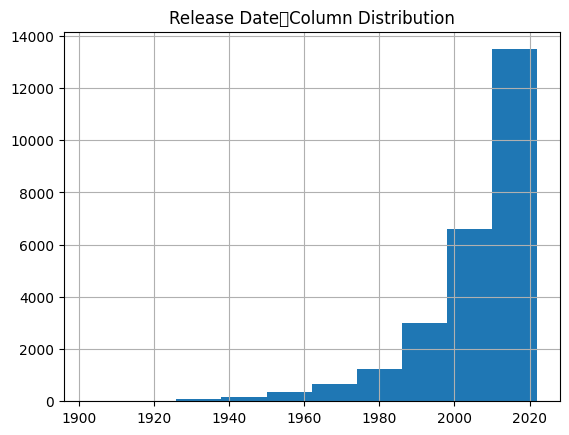

In [136]:
df['Release_Date'].hist()
plt.title('Release Date	Column Distribution')
plt.show()